In [1]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, SimpleRNN, Flatten
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

from utils import evaluate_model, tokenize_training_data, preprocess_text, word2vec_training_data

# Importing data

In [2]:
# Importing data and preprocessing it
data = pd.read_csv('data\Phishing_Email.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)

sample_size = 1000
label_encoder = LabelEncoder()

X = data['Email Text'].iloc[:sample_size].apply(preprocess_text)
y = data['Email Type'].iloc[:sample_size]
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Embedding of the text

I use here embedding function Tokenizer from Keras. It is a very useful function that allows to tokenize the text and to create a dictionary of words. It also allows to create a matrix of words that can be used in the neural network.

In [3]:
# Parameters
max_words = 100
max_sequence_length = 32

# Tokenize the training & testing data
tokenizer, X_train= tokenize_training_data(X_train, max_words, max_sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_sequence_length)

I tried to implement the Word2Vec encoder but I didn't manage to do it in time.

In [18]:
"""# Parameters
max_words = 100
max_sequence_length = max(len(sequence) for sequence in X_train) 
min_count = 1
window = 5

# Word2Vec and get vectors for testing data
Word2Vec, X_train = word2vec_training_data(X_train, max_words, min_count, window)
X_test_tokenized = [text_to_word_sequence(text) for text in X_test]
X_test = [[Word2Vec.wv[word] for word in text if word in Word2Vec.wv.key_to_index] for text in X_test_tokenized]"""

'# Parameters\nmax_words = 100\nmax_sequence_length = max(len(sequence) for sequence in X_train) \nmin_count = 1\nwindow = 5\n\n# Word2Vec and get vectors for testing data\nWord2Vec, X_train = word2vec_training_data(X_train, max_words, min_count, window)\nX_test_tokenized = [text_to_word_sequence(text) for text in X_test]\nX_test = [[Word2Vec.wv[word] for word in text if word in Word2Vec.wv.key_to_index] for text in X_test_tokenized]'

# Testing different Deep Learning models  

We will try 3 types of Deep Learning models:
- Simple Neural Network
- RNN
- LSTM
- CNN

For each of this model, we will use a Tokenizer to encode the input. We ill use Adam as optimizer and binary_crossentropy as loss function. We also implemented an early stopper to avoid overfitting.

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 0.5658 - accuracy: 0.6762
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.8950
Epoch 3/100
400/400 [==============================] - 1s 4ms/step - loss: 0.1548 - accuracy: 0.9400
Epoch 4/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.9663
Epoch 5/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0779 - accuracy: 0.9725
Epoch 6/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9775
Epoch 7/100
400/400 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9787
Epoch 8/100
400/400 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9812
Epoch 9/100
400/400 [==============================] - 1s 4ms/step - loss: 0.0597 - accuracy: 0.9787
Epoch 10/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0705 - accura

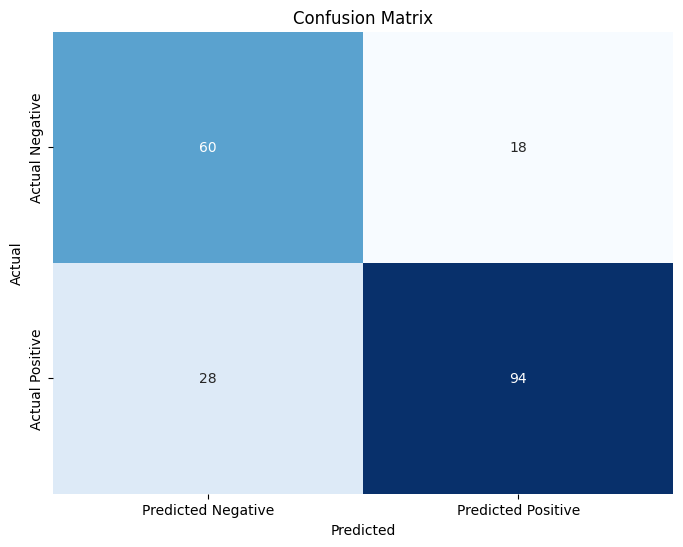

Classficiation report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        78
           1       0.84      0.77      0.80       122

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.78      0.77      0.77       200



In [6]:
# Parameters
embedding_dim = 32

# Create a Sequential model with Dense layers
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor="loss", patience=3)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the model on test data
metrics = evaluate_model(model, X_test, y_test)

Epoch 1/100
400/400 [==============================] - 5s 7ms/step - loss: 0.6170 - accuracy: 0.6388
Epoch 2/100
400/400 [==============================] - 3s 7ms/step - loss: 0.3840 - accuracy: 0.8300
Epoch 3/100
400/400 [==============================] - 2s 6ms/step - loss: 0.2772 - accuracy: 0.8925
Epoch 4/100
400/400 [==============================] - 2s 6ms/step - loss: 0.2185 - accuracy: 0.9200
Epoch 5/100
400/400 [==============================] - 3s 7ms/step - loss: 0.1522 - accuracy: 0.9550
Epoch 6/100
400/400 [==============================] - 3s 7ms/step - loss: 0.1314 - accuracy: 0.9575
Epoch 7/100
400/400 [==============================] - 3s 7ms/step - loss: 0.1016 - accuracy: 0.9700
Epoch 8/100
400/400 [==============================] - 2s 6ms/step - loss: 0.0800 - accuracy: 0.9750
Epoch 9/100
400/400 [==============================] - 2s 6ms/step - loss: 0.1272 - accuracy: 0.9575
Epoch 10/100
400/400 [==============================] - 2s 6ms/step - loss: 0.1082 - accura

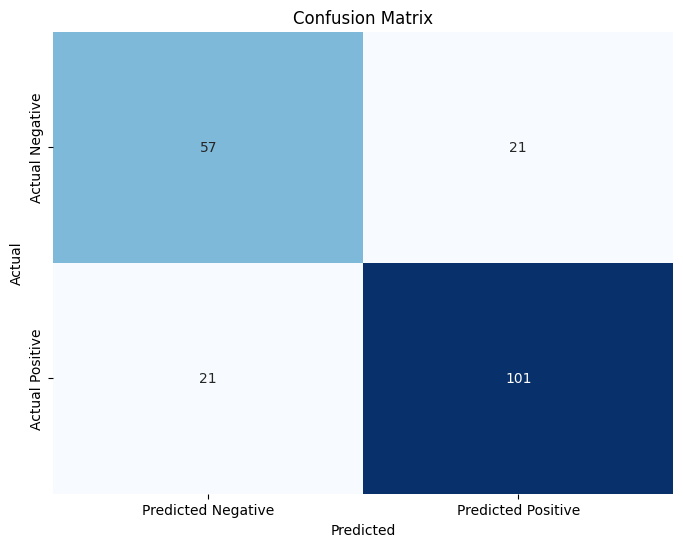

Classficiation report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        78
           1       0.83      0.83      0.83       122

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200



In [7]:
# Parameters
embedding_dim = 32
rnn_units = 32

# Create a Sequential model with RNN
modelRNN = keras.Sequential()
modelRNN.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelRNN.add(SimpleRNN(units=rnn_units))
modelRNN.add(Dense(1, activation='sigmoid'))

# Compile the model
modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor="loss", patience=3)

# Train the modelRNN with early stopping
modelRNN.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the model on test data
rnn_metrics = evaluate_model(modelRNN, X_test, y_test)

Epoch 1/100
400/400 [==============================] - 6s 11ms/step - loss: 0.5432 - accuracy: 0.7038
Epoch 2/100
400/400 [==============================] - 3s 8ms/step - loss: 0.3364 - accuracy: 0.8650
Epoch 3/100
400/400 [==============================] - 4s 9ms/step - loss: 0.2811 - accuracy: 0.8913
Epoch 4/100
400/400 [==============================] - 4s 9ms/step - loss: 0.2516 - accuracy: 0.9062
Epoch 5/100
400/400 [==============================] - 3s 7ms/step - loss: 0.2300 - accuracy: 0.9087
Epoch 6/100
400/400 [==============================] - 3s 8ms/step - loss: 0.2130 - accuracy: 0.9175
Epoch 7/100
400/400 [==============================] - 3s 8ms/step - loss: 0.2063 - accuracy: 0.9237
Epoch 8/100
400/400 [==============================] - 3s 8ms/step - loss: 0.1854 - accuracy: 0.9300
Epoch 9/100
400/400 [==============================] - 3s 7ms/step - loss: 0.1726 - accuracy: 0.9312
Epoch 10/100
400/400 [==============================] - 3s 7ms/step - loss: 0.1549 - accur

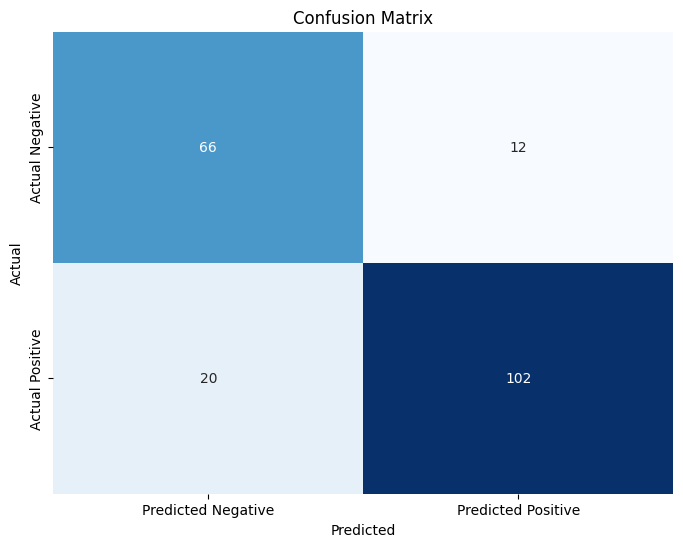

Classficiation report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.89      0.84      0.86       122

    accuracy                           0.84       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.85      0.84      0.84       200



In [ ]:
# Parameters
embedding_dim = 32
lstm_units = 32

# Create a Sequential model with LSTM
modelLSTM = keras.Sequential()
modelLSTM.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelLSTM.add(LSTM(units=lstm_units))
modelLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor="loss", patience=3)

# Train the model with early stopping
modelLSTM.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the modelLSTM on test data
cnn_metrics = evaluate_model(modelLSTM, X_test, y_test)

Epoch 1/100


400/400 [==============================] - 1s 2ms/step - loss: 0.5637 - accuracy: 0.6938
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3178 - accuracy: 0.8675
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.8913
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9225
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1751 - accuracy: 0.9362
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1536 - accuracy: 0.9463
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.9613
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9712
Epoch 9/100
400/400 [==============================] - 1s 1ms/step - loss: 0.0943 - accuracy: 0.9712
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9750
E

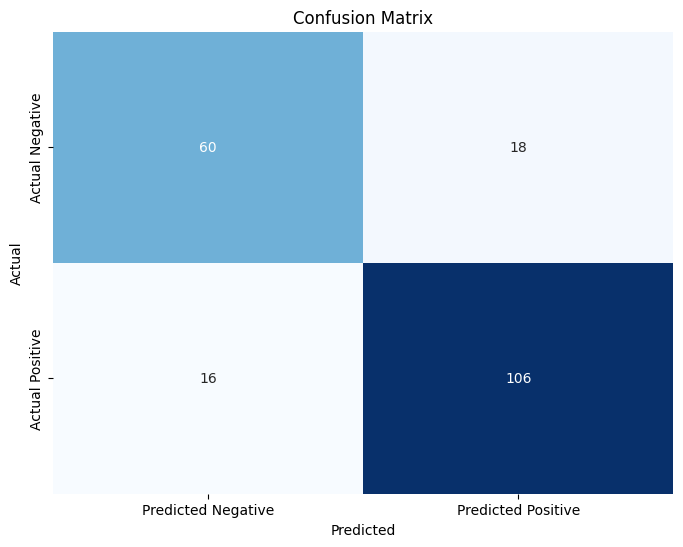

Classficiation report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        78
           1       0.85      0.87      0.86       122

    accuracy                           0.83       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200



In [ ]:
# Parameters
embedding_dim = 32
num_filters = 32
kernel_size = 3

# Create a Sequential model with 1D CNN
modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelCNN.add(Conv1D(num_filters, kernel_size, activation='relu'))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(1, activation='sigmoid'))

# Compile the model
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor="loss", patience=3)

# Train the model with early stopping
modelCNN.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the model on test data
conv1d_metrics = evaluate_model(modelCNN, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 32)            3200      
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
7/7 [==============================] - 0s 4ms/step


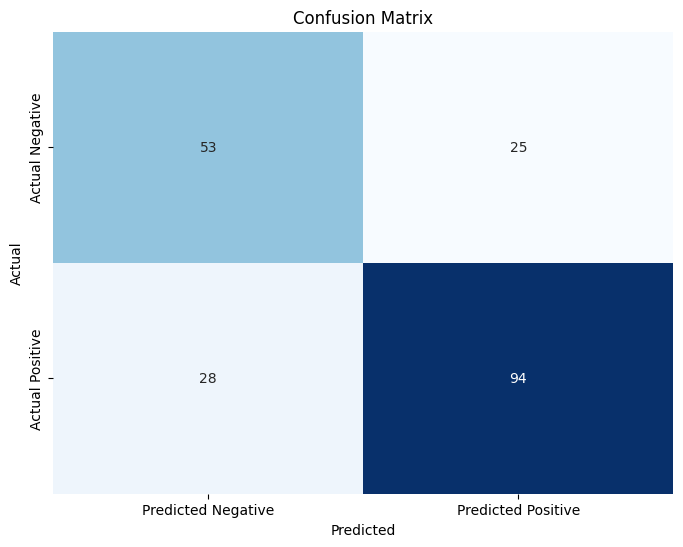

Classficiation report: 
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        78
           1       0.79      0.77      0.78       122

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.74      0.73      0.74       200


---------------------------------------------------------------------------------------- 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 32)            3200      
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total 

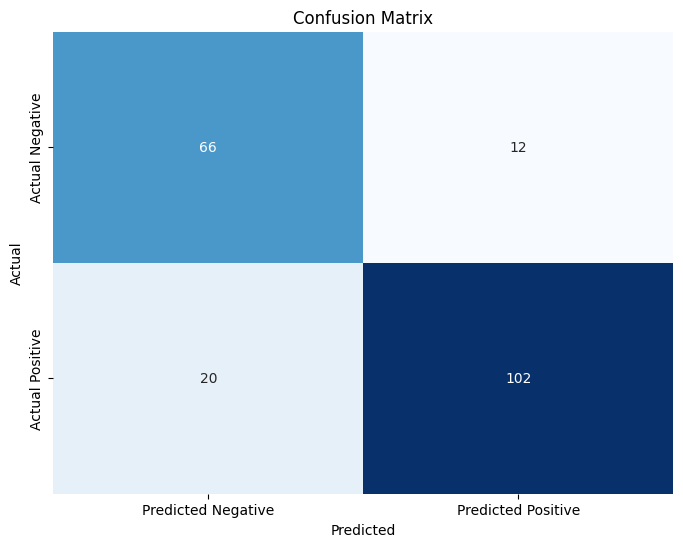

Classficiation report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.89      0.84      0.86       122

    accuracy                           0.84       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.85      0.84      0.84       200


---------------------------------------------------------------------------------------- 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 32)            3200      
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            3104      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
      

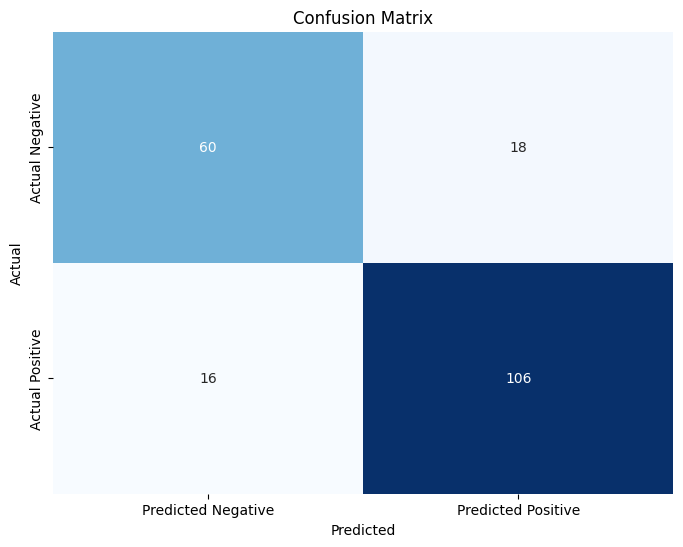

Classficiation report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        78
           1       0.85      0.87      0.86       122

    accuracy                           0.83       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200


---------------------------------------------------------------------------------------- 



In [ ]:
for model in [metrics ,modelRNN, modelLSTM, modelCNN]:
  print(model.summary())
  evaluate_model(model, X_test, y_test)
  print("\n---------------------------------------------------------------------------------------- \n")

Seing this output, we can see that the best model is the one with the LSTM layer. We choosed this model with the global f1-score. We can also see that the TSTM is much longer to train than the CNN model which have a rather similar f1-score. We can see that the RNN model is not performing well at all. This is due to the fact that the RNN model is not able to learn long term dependencies. The LSTM model is able to learn long term dependencies thanks to the cell state.